In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import argparse, os, time
import urllib3, random
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import re
import winsound

# read

In [63]:
res = []
with open('simple_second_connections_all.csv') as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
       res.append(row)

In [65]:
df = pd.DataFrame(res,columns = ['primary','name','link','occupation','location','num_res'])
df

,primary,name,link,occupation,location,num_res
0,0,Kamal Gopinath,/in/kamalgopinath/,Associate Director at Global Edge Software Inc...,San Francisco Bay Area,Showing 47 results
1,0,Steve Randle,/in/steve-randle-3652a3/,MD at Randle Engineering Solutions,"Coventry, United Kingdom",Showing 47 results
2,0,Lakshmi Prasanna P,/in/lakshmi-prasanna-p-9b0a9a15/,Assistant Vice President Operations at BA Cont...,"Hyderabad Area, India",Showing 47 results
3,1,John (Giovanni) S.,/in/giovannisuero/,Executive Director Business Development at Hol...,San Francisco Bay Area,Showing 285 results
4,1,Roberto Bianco,/in/roberto-bianco-engineer/,Engineering consultant,"Coventry, United Kingdom",Showing 285 results
5,1,Angelo Cavallo,/in/angelo-cavallo/,Bobst Web-Fed BU Sales Manager,"Turin Area, Italy",Showing 285 results
6,2,Roberto Bianco,/in/roberto-bianco-engineer/,Engineering consultant,"Coventry, United Kingdom",Showing 29 results
7,2,Michele Devita,/in/micheledevita/,Nuclear Safety Inspector - Fuel and Core,"Gloucester, United Kingdom",Showing 29 results
8,2,Mattia Strocchi,/in/mstrocchi/,Computer Science &amp; Engineering at TU Delft,"The Hague Area, Netherlands",Showing 29 results
9,3,Andrea Gerardi,/in/andrea-gerardi-79b99718/,Senior Software Developer at IT Euro Consulting,"Padova Area, Italy",Showing 197 results


In [69]:
dfn = df[df['name']!='Roberto Bianco']
dfn

,primary,name,link,occupation,location,num_res
0,0,Kamal Gopinath,/in/kamalgopinath/,Associate Director at Global Edge Software Inc...,San Francisco Bay Area,Showing 47 results
1,0,Steve Randle,/in/steve-randle-3652a3/,MD at Randle Engineering Solutions,"Coventry, United Kingdom",Showing 47 results
2,0,Lakshmi Prasanna P,/in/lakshmi-prasanna-p-9b0a9a15/,Assistant Vice President Operations at BA Cont...,"Hyderabad Area, India",Showing 47 results
3,1,John (Giovanni) S.,/in/giovannisuero/,Executive Director Business Development at Hol...,San Francisco Bay Area,Showing 285 results
5,1,Angelo Cavallo,/in/angelo-cavallo/,Bobst Web-Fed BU Sales Manager,"Turin Area, Italy",Showing 285 results
7,2,Michele Devita,/in/micheledevita/,Nuclear Safety Inspector - Fuel and Core,"Gloucester, United Kingdom",Showing 29 results
8,2,Mattia Strocchi,/in/mstrocchi/,Computer Science &amp; Engineering at TU Delft,"The Hague Area, Netherlands",Showing 29 results
9,3,Andrea Gerardi,/in/andrea-gerardi-79b99718/,Senior Software Developer at IT Euro Consulting,"Padova Area, Italy",Showing 197 results
10,3,Marco Verdesca,/in/marcoverdesca/,Senior Director Of Engineering at Oracle,San Francisco Bay Area,Showing 197 results
11,3,Cosimo Distante,/in/cosimo-distante-7115885/,Researcher at CNR - Institute of Applied Scien...,"Lecce Area, Italy",Showing 197 results


In [70]:
dfn.to_csv('second_clean.csv',sep=';')

# proc

In [71]:
len(np.unique(dfn['link']))

425

# re-read

In [2]:
df = pd.read_csv('simple_second_clean.csv', sep = ';')

In [3]:
df.head()

,Unnamed: 0,primary,name,link,occupation,location,num_res
0,0,0,Kamal Gopinath,/in/kamalgopinath/,Associate Director at Global Edge Software Inc...,San Francisco Bay Area,Showing 47 results
1,1,0,Steve Randle,/in/steve-randle-3652a3/,MD at Randle Engineering Solutions,"Coventry, United Kingdom",Showing 47 results
2,2,0,Lakshmi Prasanna P,/in/lakshmi-prasanna-p-9b0a9a15/,Assistant Vice President Operations at BA Cont...,"Hyderabad Area, India",Showing 47 results
3,3,1,John (Giovanni) S.,/in/giovannisuero/,Executive Director Business Development at Hol...,San Francisco Bay Area,Showing 285 results
4,5,1,Angelo Cavallo,/in/angelo-cavallo/,Bobst Web-Fed BU Sales Manager,"Turin Area, Italy",Showing 285 results


In [26]:
city = []
region = []
country = []

for location in df['location']:
    strmod = re.sub(' area','', location, flags =re.IGNORECASE)
    tt = re.split(',', strmod)
    # country is always last
    country.append(tt[len(tt)-1].strip())
    if len(tt)>1:
        city.append(tt[0].strip())
        #city.append( re.sub('Area', '', tt[0]).strip())
    else:
        city.append('')
        
    if len(tt)>2:
        region.append( tt[1].strip())
    else:
        region.append('')
    if len(tt)>3:
        print(location)


In [33]:
np.unique(region)

array(['', 'Arizona', 'California', 'Connecticut', 'Greater Atlanta',
       'Greater Boston', 'Greater Chicago', 'Greater Detroit',
       'Greater Los Angeles', 'Greater New York City',
       'Greater Philadelphia', 'Greater Seattle',
       'Lower Silesian District', 'New York', 'North Carolina', 'Oregon',
       'San Francisco Bay'], dtype='<U23')

In [28]:
usa_regions=['Arizona', 'California','Connecticut','Greater Atlanta',\
            'Greater Boston','Greater Chicago','Greater Detroit',\
            'Greater Los Angeles','Greater New York City','Greater Philadelphia',\
            'Greater Seattle','New York','North Carolina','Oregon',\
            'San Francisco Bay']

In [31]:
for k in range(len(country)):
    if country[k] in usa_regions:
        region[k]= country[k]
        country[k] = 'USA'

In [30]:
'California' in usa_regions

True

In [36]:
df['city'] = city
df['region'] = region
df['country'] = country
df.head()

,Unnamed: 0,primary,name,link,occupation,location,num_res,city,region,country
0,0,0,Kamal Gopinath,/in/kamalgopinath/,Associate Director at Global Edge Software Inc...,San Francisco Bay Area,Showing 47 results,,San Francisco Bay,USA
1,1,0,Steve Randle,/in/steve-randle-3652a3/,MD at Randle Engineering Solutions,"Coventry, United Kingdom",Showing 47 results,Coventry,,United Kingdom
2,2,0,Lakshmi Prasanna P,/in/lakshmi-prasanna-p-9b0a9a15/,Assistant Vice President Operations at BA Cont...,"Hyderabad Area, India",Showing 47 results,Hyderabad,,India
3,3,1,John (Giovanni) S.,/in/giovannisuero/,Executive Director Business Development at Hol...,San Francisco Bay Area,Showing 285 results,,San Francisco Bay,USA
4,5,1,Angelo Cavallo,/in/angelo-cavallo/,Bobst Web-Fed BU Sales Manager,"Turin Area, Italy",Showing 285 results,Turin,,Italy


In [48]:
(link_unique, ix, counts) = np.unique(df['link'], return_index = True,\
                                   return_counts=True)


In [49]:
ix

array([239, 609, 511, 175, 572, 624, 554, 124, 707, 478, 569, 250, 680,
       181, 618, 340, 512, 484, 215, 310,   7, 434, 162, 106, 123, 137,
       199,  57, 138, 219,   4, 200, 377, 303, 542, 292, 322, 540, 305,
       298,  16,  32,  22,  39, 634, 475,  99, 149, 590, 666, 316, 246,
       490,  51, 552, 321, 204, 136, 698, 561, 672, 697, 385, 243, 455,
       534, 210,  96, 367, 179,  67,  10, 496, 213, 371, 573, 217, 656,
        15, 192, 625,  71, 125,  81, 601, 519, 195,   9, 382, 341, 134,
       401, 296, 474, 143,  72, 278, 559, 266,  87, 220, 347, 244, 211,
       525, 602, 640, 172, 245,  79, 275, 117,  66, 311, 191, 388,  13,
       440,  40,  92, 535, 287, 403,  18, 268, 304,  85, 527, 105, 100,
       402, 600, 670, 357, 500, 284,  11, 710, 193, 681, 233, 613, 635,
       232, 483,  80, 530, 272, 560, 190, 237, 458, 654, 426, 159, 541,
       677, 410, 703, 599, 271,  95, 704, 536, 306, 171,  47,  27, 493,
        26,  65, 180,  12, 115, 674, 249, 615,   3, 231, 529, 26

In [40]:
len(df)

714

In [50]:
dfunique = df.iloc[ix]

In [56]:
dfunique

,Unnamed: 0,primary,name,link,occupation,location,num_res,city,region,country
239,246,99,Fabiola B.,/in/236540/,Senior Manager Commercial Finance at Gap Inc.,"London, United Kingdom",Showing 290 results,London,,United Kingdom
609,629,253,Aaron Frichtl,/in/aaronfrichtl/,Developer | Product Manager | Facilitator,"Portland, Oregon Area",Showing 220 results,Portland,Oregon,USA
511,526,210,Abhishek Jaishwal (EIT-PEO),/in/abhishek-jaishwal-eit-peo-4a380562/,Mechanical Designer (Automotive &amp; Automation),Canada,Showing 77 results,,,Canada
175,180,72,Abhishek Singhal,/in/abhishek-singhal-09815814/,Tata Elxsi | IIM Bangalore | Renault Nissan | ...,"Bengaluru Area, India",Showing 346 results,Bengaluru,,India
572,592,239,Abhishek Sampat,/in/abhisheksampat/,Lead - Off Board Energy Services at Jaguar Lan...,"Coventry, United Kingdom",Showing 997 results,Coventry,,United Kingdom
624,644,258,Adele Spiby,/in/adele-spiby-123080a/,Associate Director at Quantum Group Solutions,"Birmingham, United Kingdom",Showing 640 results,Birmingham,,United Kingdom
554,572,230,Adriano De Carlo,/in/adriano-de-carlo-33044843/,Controller,"Stuttgart Area, Germany",Showing 111 results,Stuttgart,,Germany
124,128,49,Alex Lopes,/in/aglopes/,Global Head of Architecture and Service Design...,"Zürich Area, Switzerland",Showing 421 results,Zürich,,Switzerland
707,729,289,Alberto Ansaldo,/in/alberto-ansaldo/,Research Technologist at IIT - Istituto Italia...,"Genoa Area, Italy",Showing 356 results,Genoa,,Italy
478,493,196,Alberto Bellini,/in/alberto-bellini-58427323/,Corporate Quality Director at Reflexallen Group,"Llandudno, United Kingdom",Showing 407 results,Llandudno,,United Kingdom


In [58]:
job = []
company = []

for k in range(len(dfunique)):
    test_string = re.sub('\&amp;', '&', dfunique['occupation'].iloc[k])
    res = re.split('(?: at )|(?: presso )|(?: bei )',  test_string)
    job.append(res[0])
    if len(res) > 1:
        company.append(res[1])
    else:
        company.append('')

In [57]:
dfunique['occupation'].iloc[0]

'Senior Manager Commercial Finance at Gap Inc.'

In [60]:
company[0]

'Gap Inc.'

In [62]:
dfunique['job'] = job
dfunique['company'] = company

C:\Users\Roberto\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Roberto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
dfunique.head()

,Unnamed: 0,primary,name,link,occupation,location,num_res,city,region,country,job,company
239,246,99,Fabiola B.,/in/236540/,Senior Manager Commercial Finance at Gap Inc.,"London, United Kingdom",Showing 290 results,London,,United Kingdom,Senior Manager Commercial Finance,Gap Inc.
609,629,253,Aaron Frichtl,/in/aaronfrichtl/,Developer | Product Manager | Facilitator,"Portland, Oregon Area",Showing 220 results,Portland,Oregon,USA,Developer | Product Manager | Facilitator,
511,526,210,Abhishek Jaishwal (EIT-PEO),/in/abhishek-jaishwal-eit-peo-4a380562/,Mechanical Designer (Automotive &amp; Automation),Canada,Showing 77 results,,,Canada,Mechanical Designer (Automotive & Automation),
175,180,72,Abhishek Singhal,/in/abhishek-singhal-09815814/,Tata Elxsi | IIM Bangalore | Renault Nissan | ...,"Bengaluru Area, India",Showing 346 results,Bengaluru,,India,Tata Elxsi | IIM Bangalore | Renault Nissan | ...,
572,592,239,Abhishek Sampat,/in/abhisheksampat/,Lead - Off Board Energy Services at Jaguar Lan...,"Coventry, United Kingdom",Showing 997 results,Coventry,,United Kingdom,Lead - Off Board Energy Services,Jaguar Land Rover


In [67]:
dfunique.to_csv('simple_second_unique_clean.csv',sep = ';')

In [2]:
dfunique = pd.read_csv('./csv_files/simple_second_unique_clean.csv',sep = ';')

In [3]:
country_count = dfunique['country'].value_counts()
country_count

United Kingdom          233
Italy                    85
USA                      27
India                    18
Germany                  14
Belgium                   6
China                     5
France                    4
Sweden                    4
Ireland                   3
Switzerland               3
Netherlands               3
Spain                     2
Brazil                    2
Portugal                  2
Canada                    2
Poland                    2
Luxembourg                1
Turkey                    1
Georgia                   1
Malta                     1
Romania                   1
Other                     1
United Arab Emirates      1
Hungary                   1
Austria                   1
Slovak Republic           1
Name: country, dtype: int64

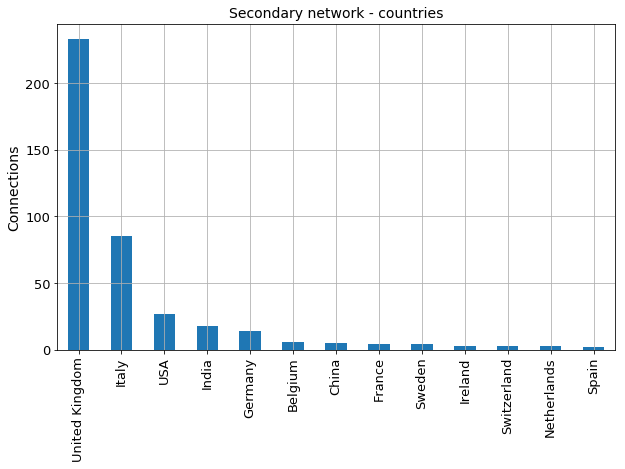

In [9]:
plt.figure(figsize = (10,6))
country_count.plot(kind='bar',grid=True)
plt.ylabel('Connections', fontsize = 14);
plt.title('Secondary network - countries',fontsize=14)
plt.yticks(fontsize = 13);
plt.xticks(fontsize = 13);
plt.xlim([-0.5,12.5]);

#plt.savefig('second_simple_country_pareto.png')

In [79]:
all_job_words = []

for k in range(len(dfunique)):
    tr = re.split('[\s,&]',dfunique['job'].iloc[k])
    all_job_words += tr

all_job_words

['Senior',
 'Manager',
 'Commercial',
 'Finance',
 'Developer',
 '|',
 'Product',
 'Manager',
 '|',
 'Facilitator',
 'Mechanical',
 'Designer',
 '(Automotive',
 '',
 '',
 'Automation)',
 'Tata',
 'Elxsi',
 '|',
 'IIM',
 'Bangalore',
 '|',
 'Renault',
 'Nissan',
 '|',
 'Jaguar',
 'LandRover',
 'Lead',
 '-',
 'Off',
 'Board',
 'Energy',
 'Services',
 'Associate',
 'Director',
 'Controller',
 'Global',
 'Head',
 'of',
 'Architecture',
 'and',
 'Service',
 'Design',
 'Research',
 'Technologist',
 'Corporate',
 'Quality',
 'Director',
 'Sales',
 'and',
 'Key',
 'Account',
 'Manager',
 '',
 'Automotive',
 'Products',
 'Group',
 'Robot',
 'Hardware',
 'Specialist',
 'Head',
 'of',
 'global',
 'portfolio',
 'Customer',
 'Manager',
 '–',
 'On',
 'Road',
 'Engines',
 'Sales',
 'consultant',
 'within',
 'the',
 'automotive',
 'industry',
 'Chairman',
 'Country',
 'Manager',
 '',
 '',
 'Gulf',
 'Area',
 '',
 '',
 'Sales',
 '',
 '',
 'Marketing',
 'CTO',
 'Machine',
 'Learning',
 'Engineer',
 'Chie

In [86]:
jw = pd.DataFrame(all_job_words,columns=['words'])
ix = (jw['words'] != '')  & (jw['words'] != 'and') & (jw['words'] != 'del') & (jw['words'] != '|') & (jw['words'] != 'di') &\
    (jw['words'] != 'in') & (jw['words'] != 'of') & (jw['words'] != '-')\
    & (jw['words'] != 'for') & (jw['words'] != '/') & (jw['words'] != 'with') 
jn=jw[ix]
job_value_count = jn['words'].value_counts()

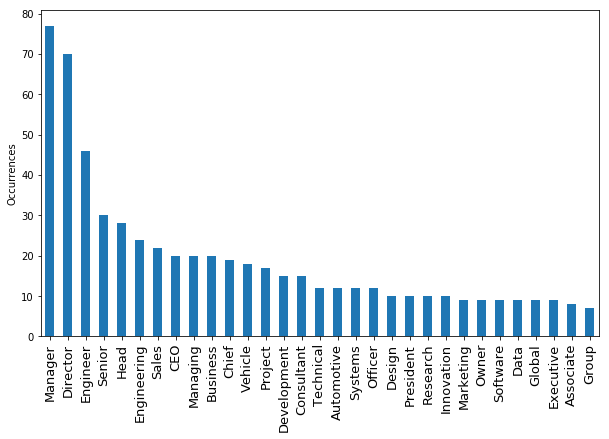

In [89]:
plt.figure(figsize = (10,6))
job_value_count.plot(kind = 'bar')
plt.xlim(-.5, 30.5);
plt.ylabel('Occurrences');
plt.xticks(fontsize = 13);
plt.savefig('Simple_second_Job_words_hist.png')


In [90]:
len(jw)

2326

In [91]:
dfunique['company'].value_counts()

                                                                    179
Jaguar Land Rover                                                    27
SAIC Motor UK Technical Centre Limited                                3
Dyson                                                                 3
CNH Industrial                                                        3
BYTON                                                                 2
Aston Martin Lagonda Ltd                                              2
Politecnico di Torino                                                 2
DRÄXLMAIER Group                                                      2
Maserati                                                              2
FCA Fiat Chrysler Automobiles                                         2
Romax Technology                                                      2
IVECO                                                                 2
AlphaSights                                                     